# Importing necessary libraries


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Rescaling, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# load data

In [3]:
train=r"C:\Users\Lakshay\Downloads\cnn dataset\completed\face shape detector"

# Image dimensions


In [4]:
img_height=180
img_width=180


# Load training and validation datasets

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train, validation_split=0.2, subset="training", seed=123, shuffle=True, image_size=(img_height, img_width)
)

Found 98 files belonging to 7 classes.
Using 79 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    train, validation_split=0.2, subset="validation", seed=123, shuffle=True, image_size=(img_height, img_width)
)

Found 98 files belonging to 7 classes.
Using 19 files for validation.


# Class names


In [7]:
data_cat=train_ds.class_names

In [35]:

print(f"Classes: {data_cat}")

Classes: ['diamond', 'heart', 'oblong', 'oval', 'round', 'square', 'triangle']


# Display sample images


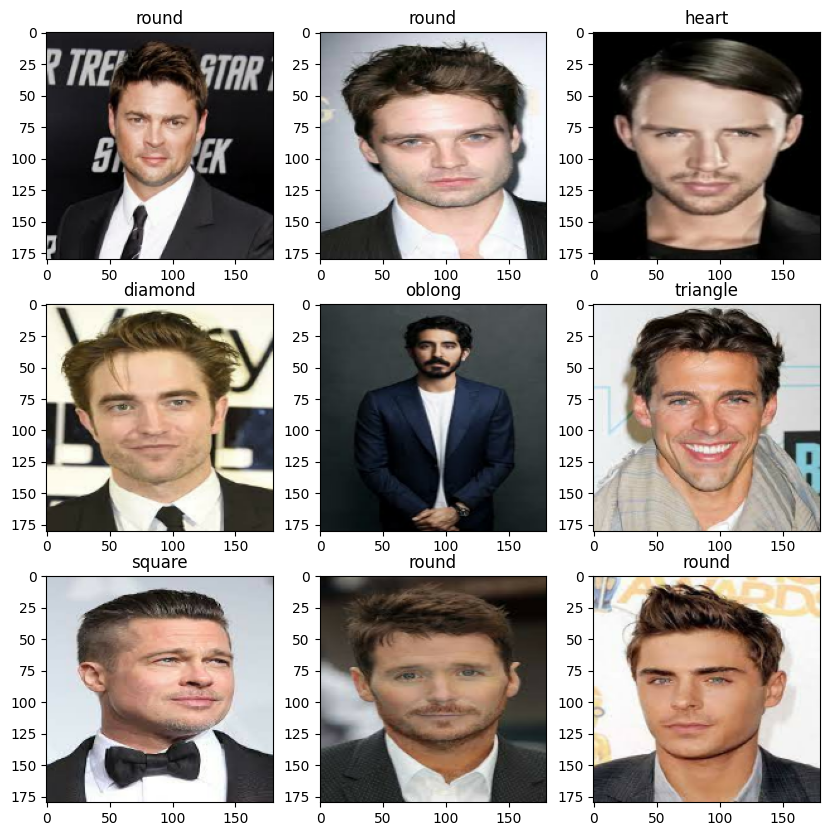

In [8]:
for image,labels in train_ds.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i].numpy()])
    plt.show()

# Building the CNN model


In [10]:
model=keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# Convolutional Layers
model.add(Conv2D(42, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(35, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(28, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(21, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(14, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer to convert feature maps into a 1D vector
model.add(Flatten())

# Fully Connected Layer (Output Layer)
model.add(Dense(units=7, activation='softmax'))  # 7 classes for classification



C:\Users\Lakshay\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Model compilation


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Correct loss name
              metrics=['accuracy'])


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 179, 179, 42)        │             546 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 42)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 88, 88, 35)          │           5,915 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 44, 44, 35)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 43, 43, 28)          │           3,948 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 21, 21, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 21)          │           2,373 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 21)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 9, 9, 14)            │           1,190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 14)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │           1,575 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,643 (182.20 KB)

 Trainable params: 15,547 (60.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,096 (121.47 KB)

# Callbacks for early stopping 


In [12]:
early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='auto',verbose=1,patience=5,restore_best_weights=True)

# Training the model


In [38]:
history=model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 1.0000 - loss: 0.0546 - val_accuracy: 0.1579 - val_loss: 5.5643
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 1.0000 - loss: 0.0371 - val_accuracy: 0.1579 - val_loss: 5.6183
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 0.0396 - val_accuracy: 0.1579 - val_loss: 5.8449
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.0271 - val_accuracy: 0.1053 - val_loss: 6.0330
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0248 - val_accuracy: 0.1053 - val_loss: 6.0619
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 1.0000 - loss: 0.0228 - val_accuracy: 0.0526 - val_loss: 6.0848
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 1.0000 - loss: 0.0183 - val_accuracy: 0.0526 - val_loss: 6.2366
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.0526 - val_loss:

# Plotting accuracy and loss


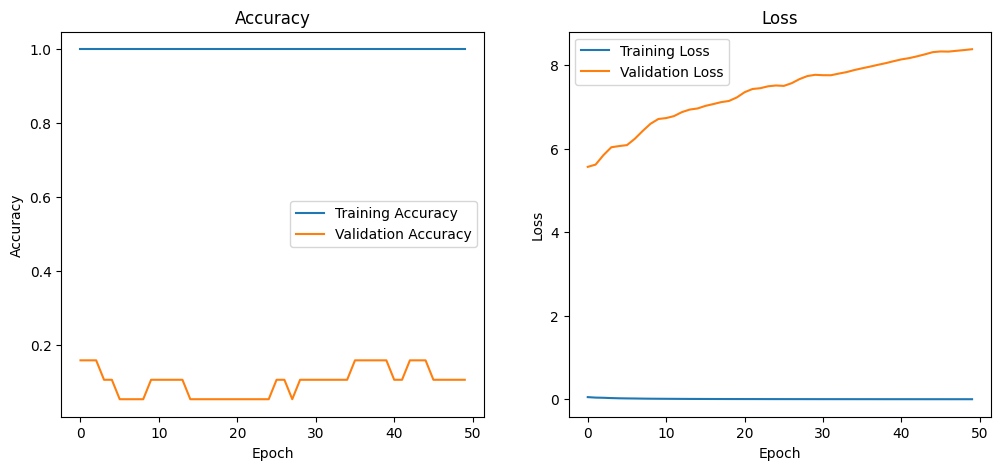

In [39]:
plt.figure(figsize=(12, 5))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Evaluation on validation data


In [41]:
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1053 - loss: 8.3801
Validation Accuracy: 0.11


# Classification report and confusion matrix


In [42]:
# Evaluation on validation data
val_loss, val_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_acc:.2f}")

# Get true and predicted labels
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred = np.argmax(model.predict(val_ds), axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=np.arange(len(data_cat)), target_names=data_cat))

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred, labels=np.arange(len(data_cat))))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1053 - loss: 8.3801
Validation Accuracy: 0.11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

Classification Report:
              precision    recall  f1-score   support

     diamond       0.00      0.00      0.00         0
       heart       0.00      0.00      0.00         2
      oblong       0.20      1.00      0.33         2
        oval       1.00      0.20      0.33         5
       round       0.00      0.00      0.00         3
      square       0.25      0.25      0.25         4
    triangle       0.00      0.00      0.00         3

    accuracy                           0.21        19
   macro avg       0.21      0.21      0.13        19
weighted avg       0.34      0.21      0.18        19


Confusion Matrix:
[[0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0]
 [0 0 2 0 0 0 0]
 [1 0 1 1 0 2 0]
 [1 0 1 0 0 1 0]
 [0 0 2 0 0 1 1]
 [0 0 3 0 0 0 0]]


C:\Users\Lakshay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lakshay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lakshay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

## Prediction function


In [44]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_class = data_cat[np.argmax(prediction)]
    print(f"Predicted Class: {predicted_class}")

In [61]:
test_image_path = r"C:\Users\Lakshay\Downloads\cnn dataset\completed\face shape detector\heart\images (5).jpg"
predict_image(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: heart
